# ML_Assignment02_Ghasemi_NoOne
# Mohammad Sadegh Ghasemi

In [42]:
# Loading the dataset
setwd('/home/mohammad/cpas/exercises/ML-Taherian/Assignment02/ML_Assignment02_Ghasemi_NoOne/‫‪ML_Problem21_Ghasemi_NoOne')
gerber <- read.csv('gerber.csv')
str(gerber)

'data.frame':	344084 obs. of  8 variables:
 $ sex      : int  0 1 1 1 0 1 0 0 1 0 ...
 $ yob      : int  1941 1947 1982 1950 1951 1959 1956 1981 1968 1967 ...
 $ voting   : int  0 0 1 1 1 1 1 0 0 0 ...
 $ hawthorne: int  0 0 1 1 1 0 0 0 0 0 ...
 $ civicduty: int  1 1 0 0 0 0 0 0 0 0 ...
 $ neighbors: int  0 0 0 0 0 0 0 0 0 0 ...
 $ self     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ control  : int  0 0 0 0 0 1 1 1 1 1 ...


## Question 1

### How many peaple have voted?

In [43]:
(voting_table = table(gerber$voting))


     0      1 
235388 108696 

### What percentage of people have voted?

In [44]:
print(mean(gerber$voting))
# print(as.numeric(voting_table[2] / sum(voting_table)))

[1] 0.3158996


### Which of the four “treatment groups” had the largest percentage of people who actually voted (voting = 1)?

In [45]:
max_voted.group = ''
max_voted.percentage = 0
for (group in names(gerber)[4:length(names(gerber))]) {
    vote_percentage = round(mean(gerber[gerber[group] == 1, ]$voting) * 100)
    print(paste(sep='', group, ': ', vote_percentage, '% voted'))
    if (max_voted.percentage < vote_percentage) {
        max_voted.group = group
        max_voted.percentage = vote_percentage
    }
}
writeLines(paste('\n', max_voted.group, 'group had the largest percentage of people who voted'))

[1] "hawthorne: 32% voted"
[1] "civicduty: 31% voted"
[1] "neighbors: 38% voted"
[1] "self: 35% voted"
[1] "control: 30% voted"

 neighbors group had the largest percentage of people who voted


## Question 2

### Build a logistic regression model for voting using the "civicduty, hawthorne, self, neighbors" as the independent variables.
### Which of the variables are significant in the logistic regression model?

In [46]:
logistic_model <- glm(voting ~ civicduty + hawthorne + self + neighbors, data = gerber, family = binomial)

summary(logistic_model)
# All 4 variables "civicduty", "hawthorne", "self", "neighbors" are significant.


Call:
glm(formula = voting ~ civicduty + hawthorne + self + neighbors, 
    family = binomial, data = gerber)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9744  -0.8691  -0.8389   1.4586   1.5590  

Coefficients:
             Estimate Std. Error  z value Pr(>|z|)    
(Intercept) -0.863358   0.005006 -172.459  < 2e-16 ***
civicduty    0.084368   0.012100    6.972 3.12e-12 ***
hawthorne    0.120477   0.012037   10.009  < 2e-16 ***
self         0.222937   0.011867   18.786  < 2e-16 ***
neighbors    0.365092   0.011679   31.260  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 429238  on 344083  degrees of freedom
Residual deviance: 428090  on 344079  degrees of freedom
AIC: 428100

Number of Fisher Scoring iterations: 4


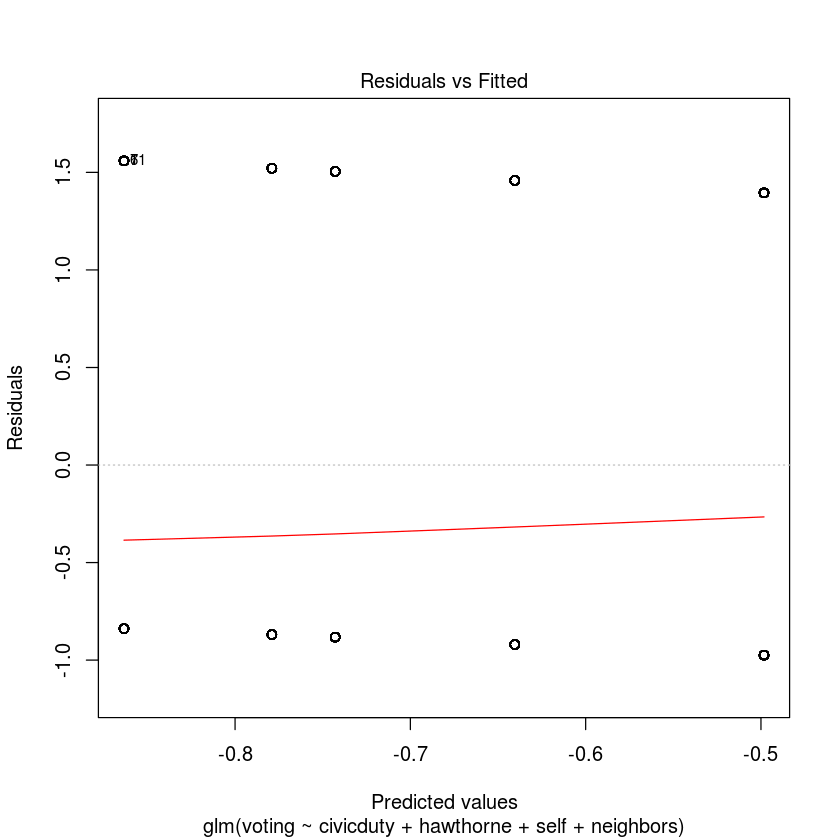

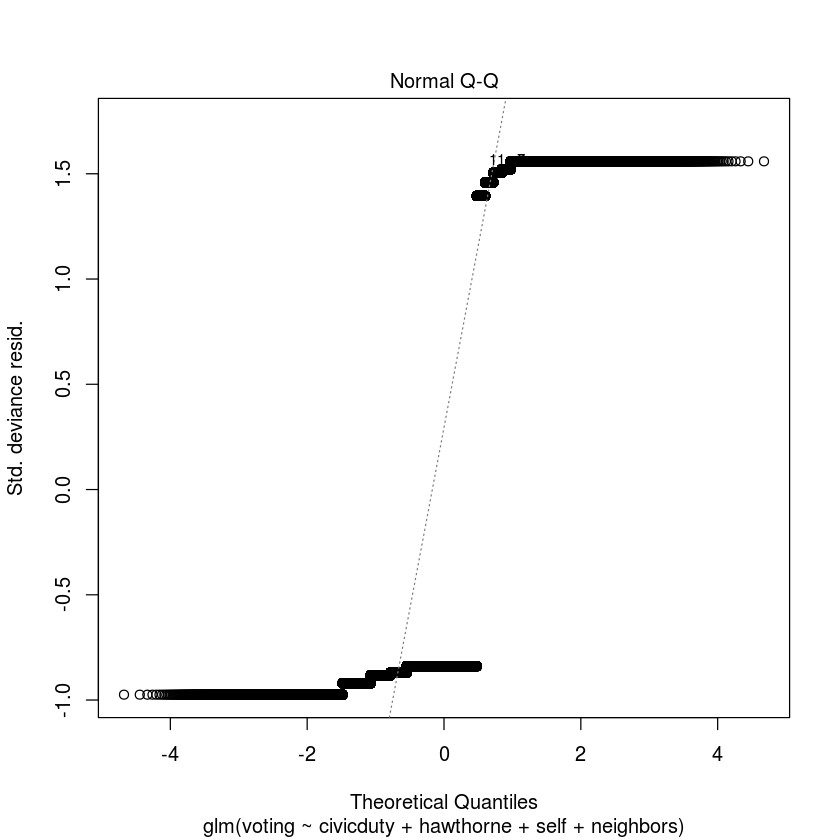

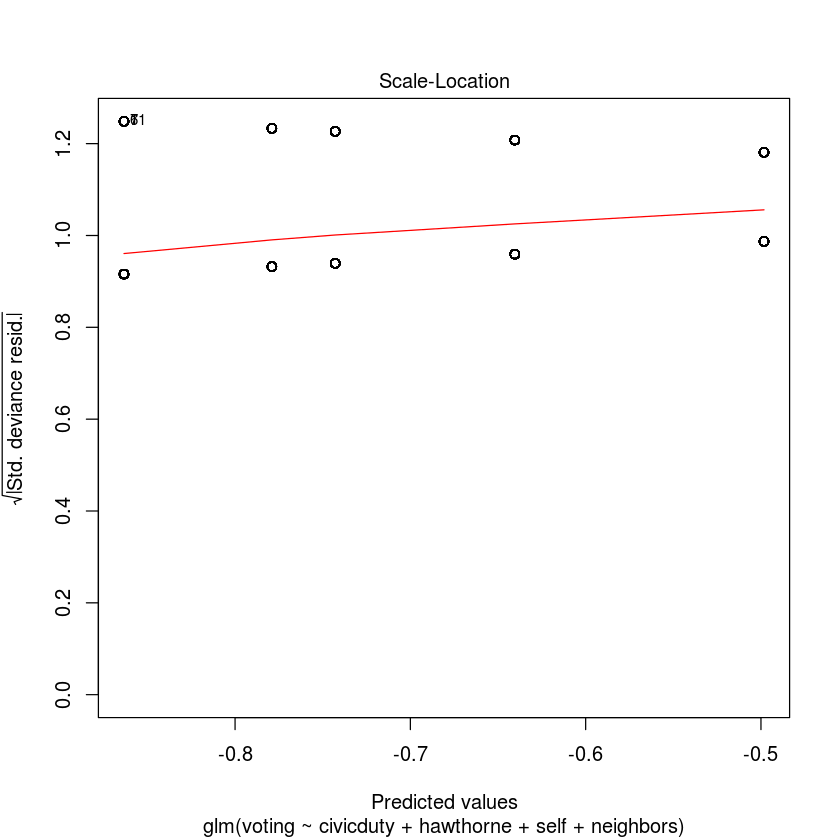

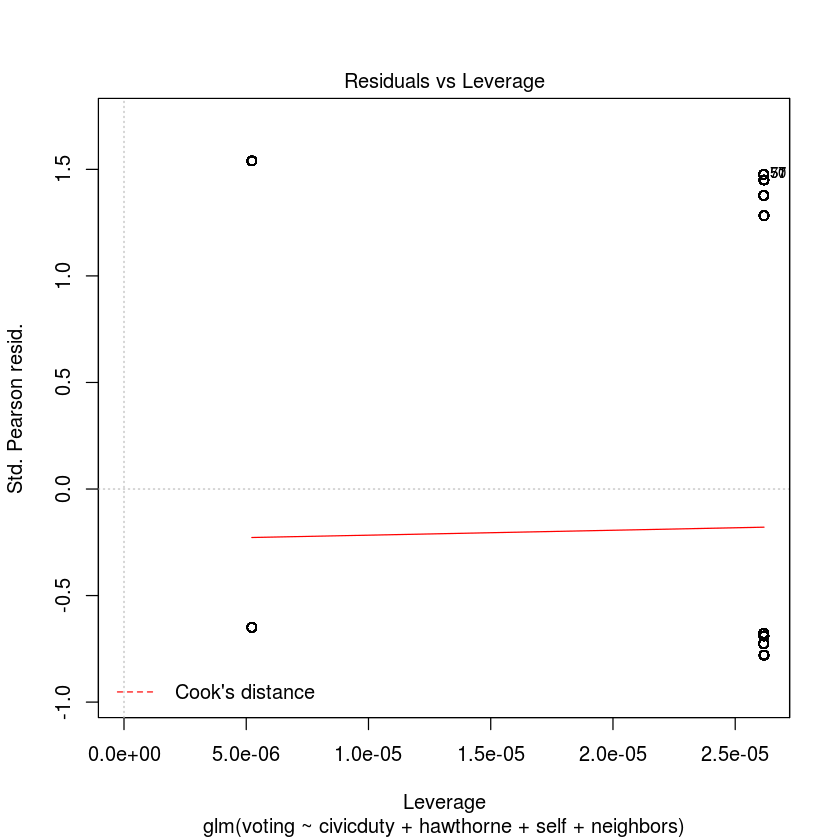

In [47]:
# plotting model
plot(logistic_model)

### Using a threshold of 0.3, what is the accuracy of the logistic regression model?

In [48]:
predict_logistic_model <- predict(logistic_model, type="response")
(confusion_matrix = table(gerber$voting, predict_logistic_model >= 0.3))
print(paste("Model accuracy with a threshold of 0.3:", sum(diag(confusion_matrix)) / sum(confusion_matrix)))

   
     FALSE   TRUE
  0 134513 100875
  1  56730  51966

[1] "Model accuracy with a threshold of 0.3: 0.541957777751944"


### Using a threshold of 0.5, what is the accuracy of the logistic regression model?

In [49]:
(confusion_matrix = table(gerber$voting, predict_logistic_model >= 0.5))
print(paste("Model accuracy with a threshold of 0.5:", confusion_matrix[1] / sum(confusion_matrix)))

   
     FALSE
  0 235388
  1 108696

[1] "Model accuracy with a threshold of 0.5: 0.684100394089815"


### Compare your model accuracy to the accuracy of the bellow baseline models
### -All people vote
### -No one vote

In [50]:
all_people_model_accuracy = nrow(subset(gerber, gerber$voting == 1)) / nrow(gerber)
no_one_model_accuracy = nrow(subset(gerber, gerber$voting == 0)) / nrow(gerber)
print(paste("Accuracy of the model in which all people vote:", all_people_model_accuracy))
print(paste("Accuracy of the model in which no one vote:", no_one_model_accuracy))
# Our model accuracy with thresholds of 0.5, 0.3 was 0.68, 0.54 respectively
# so it's not better than the second baseline model

[1] "Accuracy of the model in which all people vote: 0.315899605910185"
[1] "Accuracy of the model in which no one vote: 0.684100394089815"


### Compare the AUC of the model with the AUC of the baseline model.

In [51]:
# AUC of the model
library(ROCR)
ROCRpred = prediction(predict_logistic_model, gerber$voting)
auc = as.numeric(performance(ROCRpred, "auc")@y.values)

# AUC of the baseline models
baseline_ROCRpred = prediction(floor(predict_logistic_model), gerber$voting)
baseline_auc = as.numeric(performance(baseline_ROCRpred, "auc")@y.values)
# baseline_ROCRpred = prediction(ceiling(predict_logistic_model), gerber$voting)
# baseline_auc = as.numeric(performance(baseline_ROCRpred, "auc")@y.values)

writeLines(paste(
    "Our model AUC:", round(auc, 4),
    "\nbaseline model AUC:", round(baseline_auc, 4)))
# Our model is a weak predictive model, but a little bit better than baseline model

Our model AUC: 0.5308 
baseline model AUC: 0.5


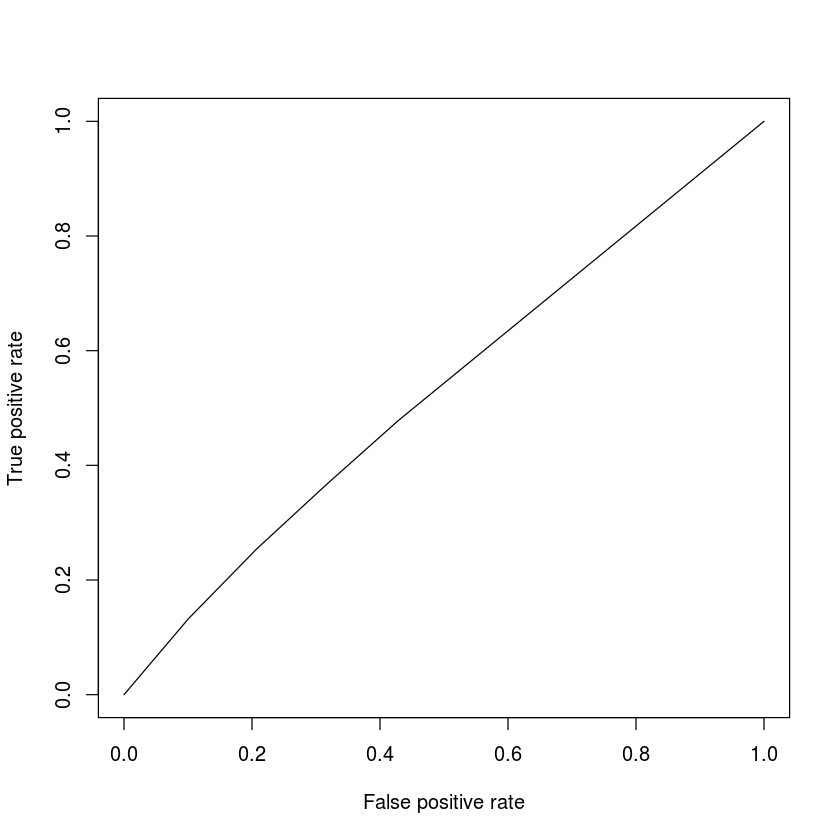

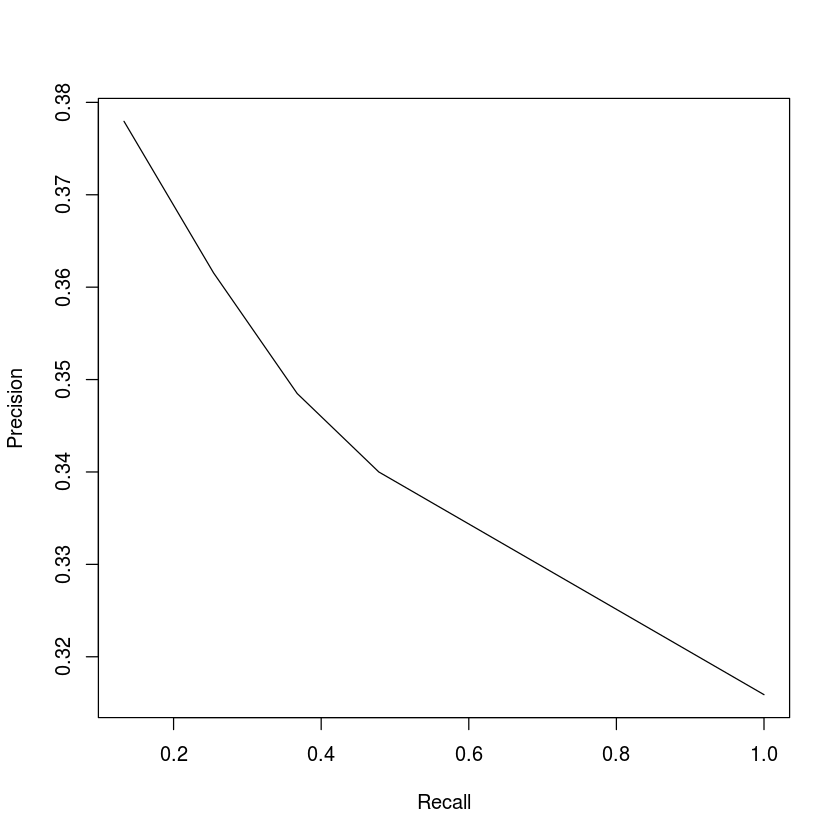

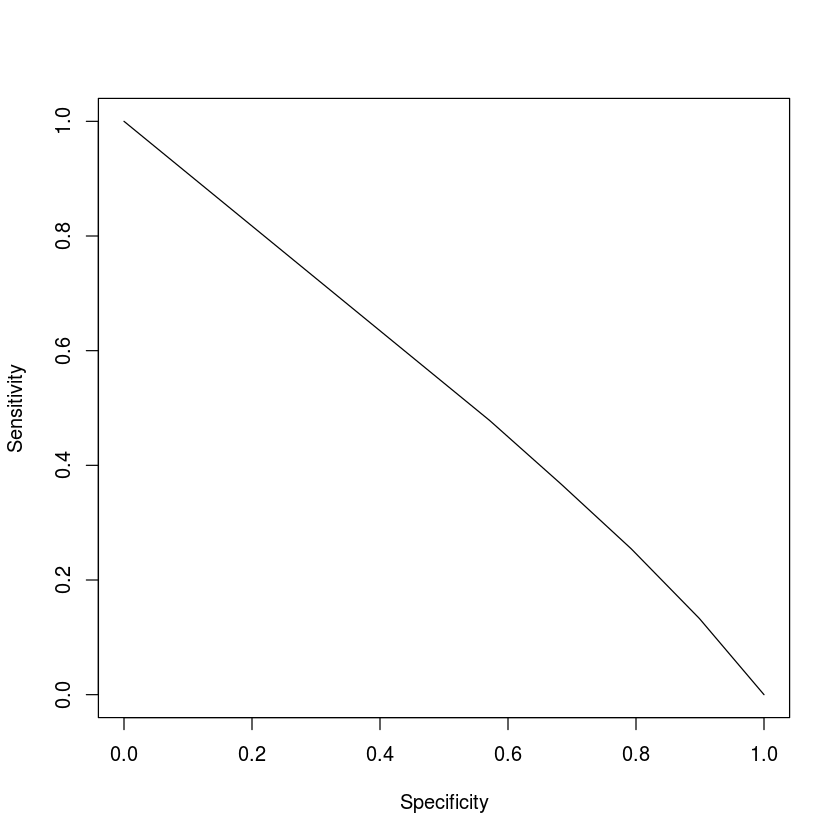

In [52]:
# plotting performance
perf_tpr_fpr = performance(ROCRpred, "tpr", "fpr")
perf_prec_rec = performance(ROCRpred, "prec", "rec")
perf_sens_spec = performance(ROCRpred, "sens", "spec")

# true_positive_rate/true_negative_rate curve
plot(perf_tpr_fpr)
# precision/recall curve
plot(perf_prec_rec)
# sensitivity/specificity curve
plot(perf_sens_spec)

## Question 3

### Build a CART tree for voting using all data and the "civicduty, hawthorne, self, neighbors" variables.

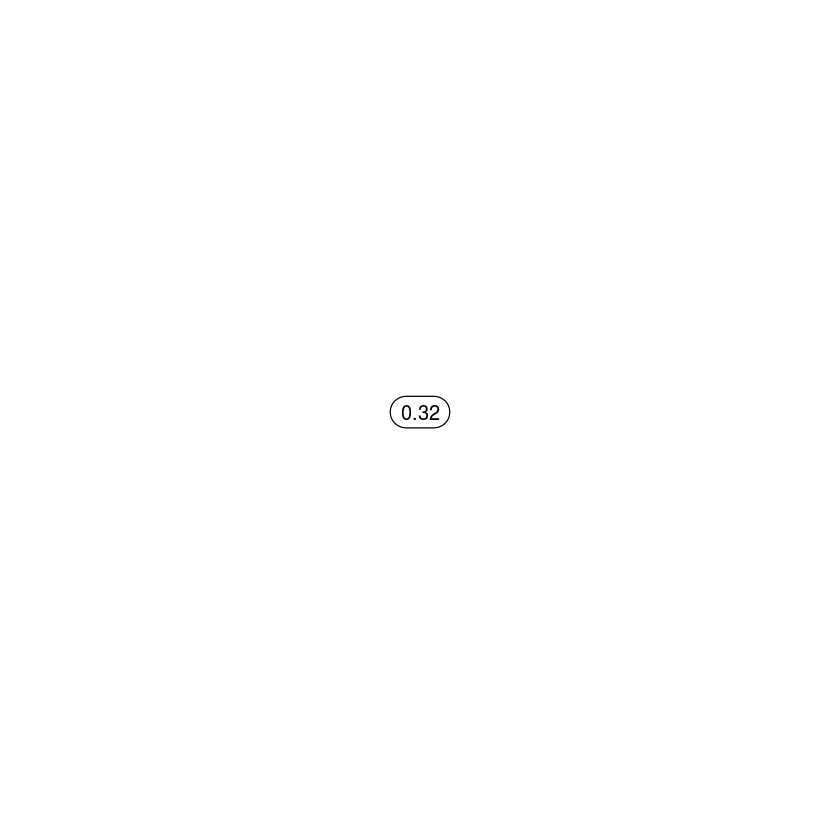

In [53]:
library(rpart)
library(rpart.plot)
CART_model1 <- rpart(voting ~ civicduty + hawthorne + self + neighbors, data = gerber)
prp(CART_model1)
# There are no splits in the tree, because none of the variables make a big enough effect to be split on.

## Question 4

### Use the parameter cp (cp=0.0) to build the tree.

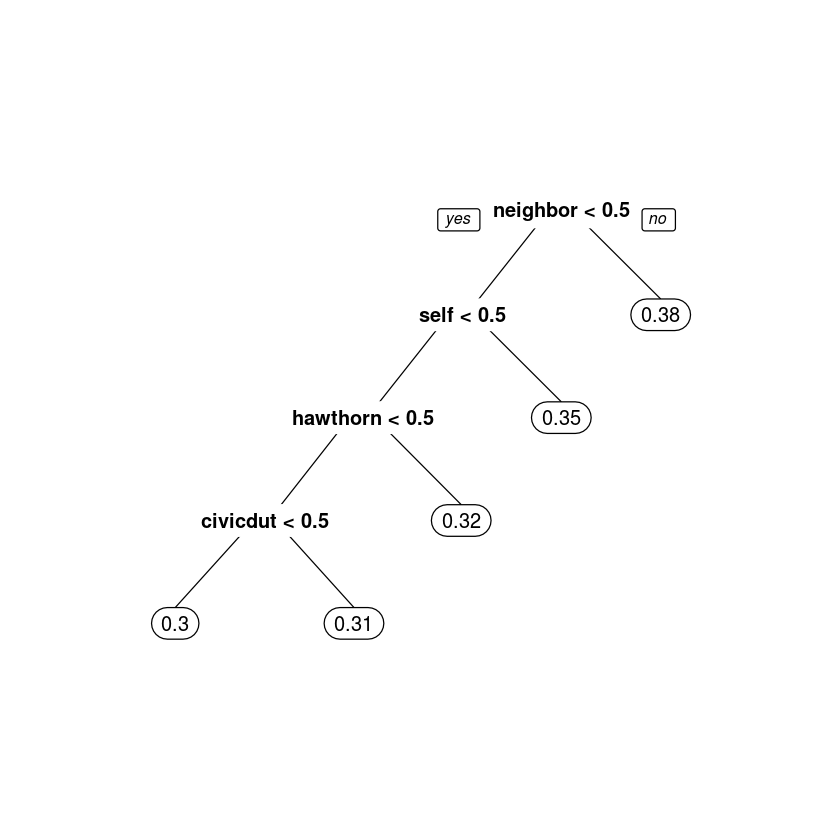

In [54]:
CARTmodel2 = rpart(voting ~ civicduty + hawthorne + self + neighbors, data=gerber, cp=0.0)
prp(CARTmodel2)

In [55]:
summary(CARTmodel2)

Call:
rpart(formula = voting ~ civicduty + hawthorne + self + neighbors, 
    data = gerber, cp = 0)
  n= 344084 

            CP nsplit rel error    xerror        xstd
1 0.0022249213      0 1.0000000 1.0000055 0.001350270
2 0.0008041280      1 0.9977751 0.9977857 0.001355053
3 0.0002280601      2 0.9969710 0.9969953 0.001356423
4 0.0001372415      3 0.9967429 0.9967704 0.001356730
5 0.0000000000      4 0.9966056 0.9966364 0.001356892

Variable importance
neighbors      self hawthorne civicduty 
       66        24         7         4 

Node number 1: 344084 observations,    complexity param=0.002224921
  mean=0.3158996, MSE=0.216107 
  left son=2 (305883 obs) right son=3 (38201 obs)
  Primary splits:
      neighbors < 0.5 to the left,  improve=2.224921e-03, (0 missing)
      self      < 0.5 to the left,  improve=4.947386e-04, (0 missing)
      hawthorne < 0.5 to the left,  improve=2.423094e-05, (0 missing)
      civicduty < 0.5 to the right, improve=1.072488e-06, (0 missing)

Node num

### What is the order of branching?
#### The highest fraction of voters are in the Neighbors, Self, Hawthorne and Civic Duty groups respectively.

## Question 5

### Using only the CART tree plot, determine what fraction of "Civic Duty" group voted?
#### 0.31

## Question 6

### Add "sex" to the variables used before, again with cp = 0.0.

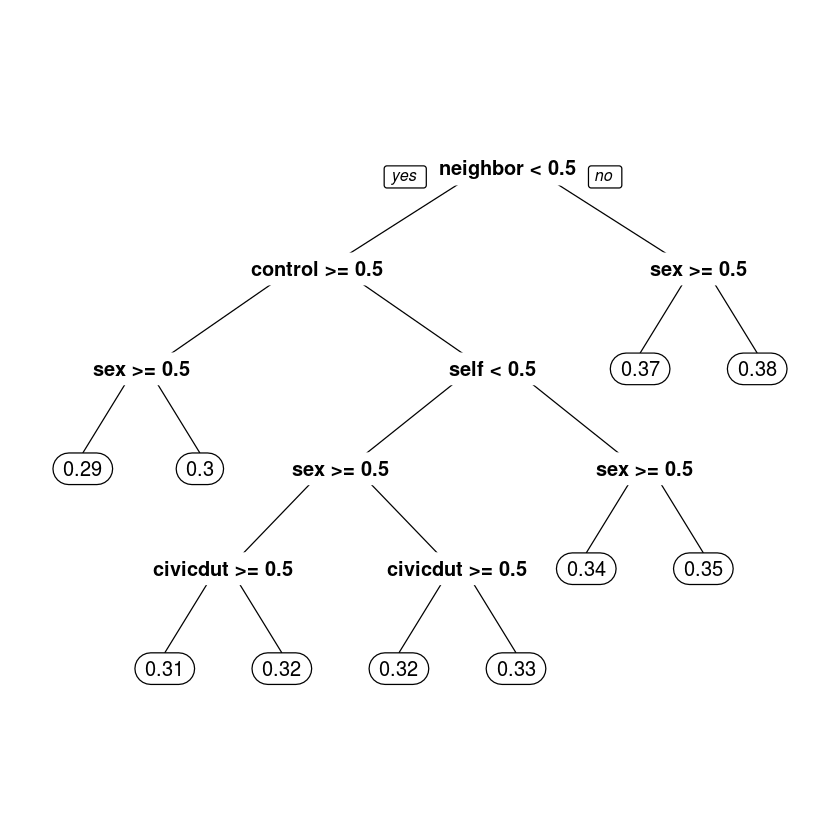

In [56]:
CARTmodel3 = rpart(voting ~ civicduty + hawthorne + self + neighbors + sex + control, data=gerber, cp=0.0)
prp(CARTmodel3)

### Pay attention to the importance of the sex variable.
#### sex is the least important variable.
### In the control group, which gender is more likely to vote?
##### Men

### What about "civic duty" group?
#### Men

## Question 7

### Create a regression tree using just the "control" variable.
### Also create a tree with the "control" and "sex" variables.
### Set cp=0.0 for both of above trees.

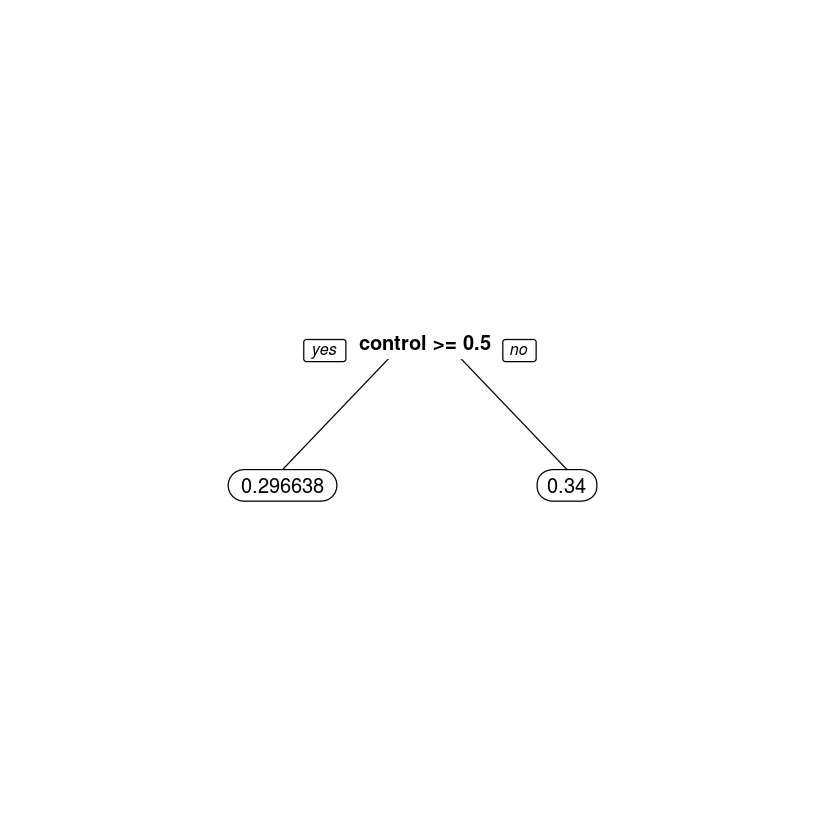

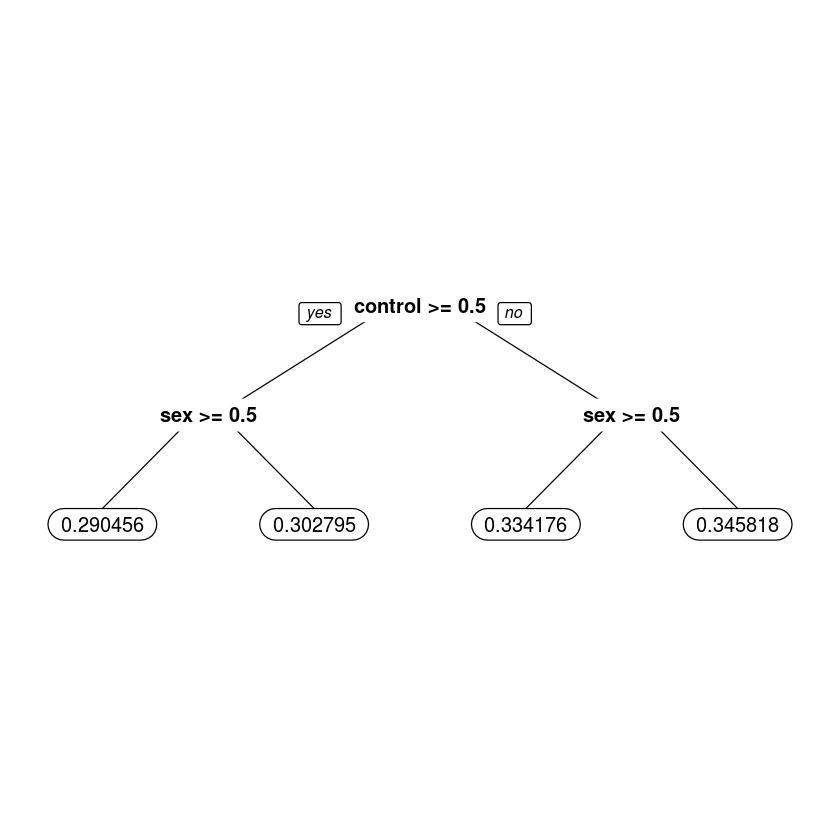

In [57]:
CARTcontrol_tree = rpart(voting ~ control, data=gerber, cp=0.0)
CARTcontrol_sex_tree = rpart(voting ~ control + sex, data=gerber, cp=0.0)
prp(CARTcontrol_tree, digits=6)
prp(CARTcontrol_sex_tree, digits=6)

### What is the absolute difference in the predicted probability of voting between being in the control group versus being in other group's, In the "control" only tree?
### ‫‪abs(control prediction - non-control prediction).

In [58]:
control_splitted_voting = CARTcontrol_tree$frame$yval[CARTcontrol_tree$frame$var == "<leaf>"]
print(abs(control_splitted_voting[1] - control_splitted_voting[2]))

[1] 0.04336208


### Now, using the second tree, determine what gender is affected more by NOT being in the control group

In [59]:
c_s_splitted_voting = CARTcontrol_sex_tree$frame$yval[CARTcontrol_sex_tree$frame$var == "<leaf>"]
affected_women = abs(c_s_splitted_voting[1] - c_s_splitted_voting[3])
affected_men = abs(c_s_splitted_voting[2] - c_s_splitted_voting[4])
writeLines(paste(
    "The amount of affected men:", round(affected_men, 6),
    "\nThe amount of affected women:", round(affected_women, 6),
    "\nWomen are more affected about:", round(affected_women - affected_men, 6),
    "\nSo they are affected about the same because the difference is very small."
    ))

The amount of affected men: 0.043024 
The amount of affected women: 0.04372 
Women are more affected about: 0.000696 
So they are affected about the same because the difference is very small.


## Question 8

### Go back to logistic regression. Create a model using "sex" and "control".

In [60]:
sex_control_log_model = glm(voting ~ control + sex, data=gerber, family="binomial")
summary(sex_control_log_model)


Call:
glm(formula = voting ~ control + sex, family = "binomial", data = gerber)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9220  -0.9012  -0.8290   1.4564   1.5717  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.635538   0.006511 -97.616  < 2e-16 ***
control     -0.200142   0.007364 -27.179  < 2e-16 ***
sex         -0.055791   0.007343  -7.597 3.02e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 429238  on 344083  degrees of freedom
Residual deviance: 428443  on 344081  degrees of freedom
AIC: 428449

Number of Fisher Scoring iterations: 4


### What is the coefficient for "sex" and what does it mean?

In [61]:
as.numeric(sex_control_log_model$coefficients['sex'])

[1] -0.05579107

#### This means that women are less likely to vote, since sex variable is 1 for women, and a negative coefficient means that larger values are predictive of 0.

### What is the absolute difference between the logistic regression and the decision tree prediction for the (Woman, Control)?

In [62]:
woman_control = data.frame(sex=1, control=1)
woman_control_predict = as.numeric(
    predict(sex_control_log_model, newdata=woman_control, type='response'))
print(round(abs(woman_control_predict - c_s_splitted_voting[1]), 5))

[1] 0.00035


### Add combination of "sex" and "control" to logistic regression as a new variable. 1 if person is woman and belongs to control group

In [63]:
sex_control_combination_lm = glm(
    voting ~ sex + control + sex:control,
    data=gerber, family="binomial")
summary(sex_control_combination_lm)


Call:
glm(formula = voting ~ sex + control + sex:control, family = "binomial", 
    data = gerber)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9213  -0.9019  -0.8284   1.4573   1.5724  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.637471   0.007603 -83.843  < 2e-16 ***
sex         -0.051888   0.010801  -4.804 1.55e-06 ***
control     -0.196553   0.010356 -18.980  < 2e-16 ***
sex:control -0.007259   0.014729  -0.493    0.622    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 429238  on 344083  degrees of freedom
Residual deviance: 428442  on 344080  degrees of freedom
AIC: 428450

Number of Fisher Scoring iterations: 4


### How the new variable (sex:control) related to the output(dependent variable)?
#### Variable coefficient is negative (-0.007259), so a value of 1 in this variable decreases the chance of voting. If the person is a woman belonging to the control group, there is less chance that she will vote.

### What is the absolute difference between the last logistic regression model and the decision tree prediction for the (Woman, Control)?

In [64]:
woman_control_predict = as.numeric(
    predict(sex_control_combination_lm, newdata=woman_control, type='response'))
print(round(abs(woman_control_predict - c_s_splitted_voting[1]), 5))

[1] 0
